In [186]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
import datetime
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


from ploting import *
import data

%matplotlib inline

pd.options.display.max_columns = 999
pd.options.display.max_rows = 100


from datetime import datetime
str(datetime.now())

'2017-10-20 16:24:09.898125'

In [222]:
df = data.read_data('Vansjo/VAN1_data_2017_02_28_10_55.xlsx')
plotter = ResultsPlotter(f='../IO/calibrated.mat')
results = plotter.env_getter('water', basin=1)

/Users/MarkelovIgor/git/biogeochemistry/MyLake_v2_Vansjo/Postproc_code/data.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df = df.convert_objects(convert_numeric=True)


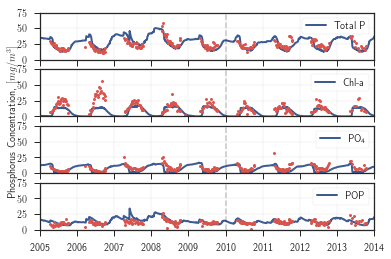

In [223]:
fig, axes = plt.subplots(4,1,sharey=True, sharex=True)

x = 'SampleDate'
env = 'water'

results = plotter.env_getter(env)
# for d,c in zip([5,], sns.color_palette()):

inx = np.where(results['z'][0, 0] == 4)[0][0]
TOTP = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['DOP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0)
Chl = np.mean(results['concentrations'][0, 0]['C'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['Chl']
                                                                                      [0, 0][0:inx, :], axis=0)
PO4 = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0)
Part = np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0)


axes[0].plot(-366 + results['days'][0, 0][0], TOTP, c=sns.xkcd_rgb["denim blue"], lw=2, label='Total P')
axes[1].plot(-366 + results['days'][0, 0][0], Chl, c=sns.xkcd_rgb["denim blue"], lw=2, label='Chl-a')
axes[2].plot(-366 + results['days'][0, 0][0], PO4, c=sns.xkcd_rgb["denim blue"], lw=2, label=r'PO\textsubscript{4}')
axes[3].plot(-366 + results['days'][0, 0][0], Part, c=sns.xkcd_rgb["denim blue"], lw=2, label='POP')




variable = 'TOTP'
axes[0].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

Chl = np.loadtxt('../obs/store_obs/Cha_aquaM_march_2017.dat', delimiter=',')
axes[1].plot(-366 + Chl[:, 0], Chl[:, 1], 'bo', c=sns.xkcd_rgb["pale red"], markersize=3)

variable = 'PO4-P'
axes[2].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

variable = 'POP'
axes[3].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)


for ax in axes:
    ax.grid(linestyle='-', linewidth=0.2)
    ax.set_ylim([0, 75])
    ax.set_xlim([732313 - 366, 735234 ])
    ax.plot((732313+366*4-1, 732313+366*4-1), (0, 100), 'k--', lw=0.3)
#     ax.set_ylabel(r'$[mg / m^3]$')
    ax.legend(loc=1, frameon=1)
    ax.set_xticks([], [])
    ax.set_yticks([0,25,50,75])
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter(' '))    

axes[3].xaxis.set_major_locator(mdates.MonthLocator(interval=12))
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   


fig.text(0.05, 0.5, r'Phosphorus Concentration, $[mg / m^3]$', va='center', rotation='vertical')

In [224]:
import extra_methods
import metrics

In [225]:
df['date2num'] = df.SampleDate.apply(extra_methods.convert_timestamp_to_num)

### Chl-a metrics

In [226]:
x = 'SampleDate'
env = 'water'
results = plotter.env_getter(env)
inx = np.where(results['z'][0, 0] == 4)[0][0]
Chl_s = np.mean(results['concentrations'][0, 0]['C'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['Chl'][0, 0][0:inx, :], axis=0)
Chl_o = np.loadtxt('../obs/store_obs/Cha_aquaM_march_2017.dat', delimiter=',')

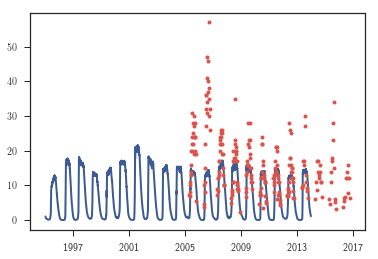

In [227]:
plt.plot(-366 + results['days'][0, 0][0], Chl_s, c=sns.xkcd_rgb["denim blue"], lw=2, label='Chl-a')
plt.plot_date(-366+Chl_o[:, 0], Chl_o[:, 1], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4)

In [228]:
days_sim = results['days'][0, 0][0]
days_obs = Chl_o[:, 0]

In [229]:
extra_methods.run_metrics(days_sim, Chl_s, Chl_o[:, 0], Chl_o[:, 1], calibration_end_date='2010-01-01')

Metrics                            During calibration            After calibration             
rmse                          	 11.034601238653895            	 5.911952548945375             
correlation                   	 0.49130948371410704           	 0.43543038593307665           
pc_bias                       	 -36.45318545951685            	 -14.845341583346531           
apb                           	 42.22817713537319             	 37.32183085077348             
norm_rmse                     	 0.5811715836305689            	 0.4728286995472127            
mae                           	 8.017788702144927             	 4.666486895588847             
bias                          	 -6.921301329146866            	 -1.8561681026907892           
NS                            	 -0.2506543564451911           	 -0.0421413112122595           
likelihood                    	 0.0019241484317676467         	 0.0054578160719633            
index_agreement               	 0.587120085260053

### Total P metrics

In [230]:
df['date2num'] = df.SampleDate.apply(extra_methods.convert_timestamp_to_num)
env = 'water'
x = 'SampleDate'

In [231]:
variable = 'TOTP'
results = plotter.env_getter(env)
inx = np.where(results['z'][0, 0] == 4)[0][0]
TOTP_s = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['DOP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0)

In [232]:
TOTP_o = np.array([df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)]['date2num'].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values])

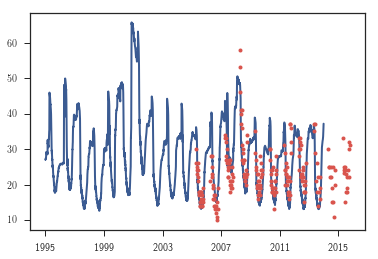

In [233]:
plt.plot(-366 + results['days'][0, 0][0], TOTP_s, c=sns.xkcd_rgb["denim blue"], lw=2, label='Total P')
plt.plot_date(-366+TOTP_o[0, :], TOTP_o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4)

In [234]:
extra_methods.run_metrics(results['days'][0, 0][0], TOTP_s, TOTP_o[0,:], TOTP_o[1, :], calibration_end_date='2010-01-01')

Metrics                            During calibration            After calibration             
rmse                          	 6.540410261668743             	 7.203678658206048             
correlation                   	 0.7170517619339645            	 0.5523625684296422            
pc_bias                       	 3.367261931853157             	 -13.524489161218812           
apb                           	 22.516141894571575            	 25.367426027216414            
norm_rmse                     	 0.28255623702453714           	 0.3072004794347572            
mae                           	 5.211875945518662             	 5.948518889752881             
bias                          	 0.7794297774041488            	 -3.1714167280296257           
NS                            	 0.2894559034260338            	 -0.6025120615005919           
likelihood                    	 0.02864660096370892           	 0.0003312754652133252         
index_agreement               	 0.831643230810098

### PO4 metrics

In [235]:
variable = 'PO4-P'
results = plotter.env_getter(env)
inx = np.where(results['z'][0, 0] == 4)[0][0]

In [236]:
PO4_s = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0)

In [237]:
PO4_o = np.array([df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)]['date2num'].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values])

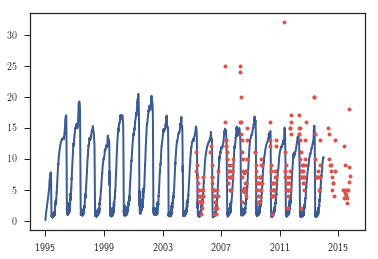

In [238]:
plt.plot(-366 + results['days'][0, 0][0], PO4_s, c=sns.xkcd_rgb["denim blue"], lw=2, label='PO4')
plt.plot_date(-366+PO4_o[0, :], PO4_o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4)

In [239]:
extra_methods.run_metrics(results['days'][0, 0][0], PO4_s, PO4_o[0,:], PO4_o[1, :], calibration_end_date='2010-01-01')

Metrics                            During calibration            After calibration             
rmse                          	 5.088426351596077             	 6.332326711499636             
correlation                   	 0.6033249143332854            	 0.6365049785806278            
pc_bias                       	 -42.04784811638595            	 -54.48957140653413            
apb                           	 57.43430441680739             	 61.75528731542025             
norm_rmse                     	 0.7025440722124761            	 0.7089627870381272            
mae                           	 4.15988461990305              	 5.515869980672763             
bias                          	 -3.0454655707153817           	 -4.866909446083617            
NS                            	 -0.3030280208795708           	 -0.7116178595777434           
likelihood                    	 0.0014808484115597393         	 0.00019198577103244802        
index_agreement               	 0.701542215745289

### PP metrics

In [240]:
variable = 'POP'
results = plotter.env_getter(env)
inx = np.where(results['z'][0, 0] == 4)[0][0]

In [241]:
PP_s = np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0)

In [242]:
PP_o = np.array([df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)]['date2num'].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values])

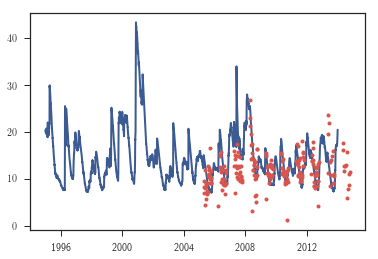

In [243]:
plt.plot(-366 + results['days'][0, 0][0], PP_s, c=sns.xkcd_rgb["denim blue"], lw=2, label='PP')
plt.plot_date(-366+PP_o[0, :], PP_o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4)

In [244]:
extra_methods.run_metrics(results['days'][0, 0][0], PP_s, PP_o[0,:], PP_o[1, :], calibration_end_date='2010-01-01')

Metrics                            During calibration            After calibration             
rmse                          	 5.218888149851942             	 3.374633852816323             
correlation                   	 0.4798641627985084            	 0.40854497055792754           
pc_bias                       	 20.669918878223477            	 -5.496135900265625            
apb                           	 34.81185917495945             	 21.71403133420588             
norm_rmse                     	 0.44725340330814717           	 0.27443568430249704           
mae                           	 4.062108817478084             	 2.670093920466844             
bias                          	 2.411921159102703             	 -0.6758394527247976           
NS                            	 -1.2003487493302805           	 -0.09816001355433213          
likelihood                    	 1.6672602632700465e-05        	 0.004124542939946867          
index_agreement               	 0.623328771815552

### Oxygen

In [245]:
variable_s = 'O2'
variable_o = 'O2'
days_sim = results['days'][0, 0][0]

In [248]:
for d in [0,5,10,15,20,25, 30, 35, 40]:
    inx = np.where(results['z'][0, 0] == d)[0][0]
    s = results['concentrations'][0, 0][variable_s][0, 0][inx, :]/1000
    o = np.array([df[(np.isfinite(df[variable_o])) & (df['Depth1'] == d)]['date2num'].values, df[(np.isfinite(df[variable_o])) & (df.Depth1 == d)][variable_o].values])
    print('\n\nDepth: {}m'.format(d))
    extra_methods.run_metrics(results['days'][0, 0][0], s, o[0,:], o[1, :], calibration_end_date='2010-01-01')



Depth: 0m
Metrics                            During calibration            After calibration             
rmse                          	 1.7353797941999214            	 1.1168881722120327            
correlation                   	 0.492876028641635             	 0.547059892293495             
pc_bias                       	 -0.8959636800065773           	 3.5259250345112165            
apb                           	 12.2859186567359              	 9.09281709329544              
norm_rmse                     	 0.17013857696149415           	 0.113263455505054             
mae                           	 1.2531393744352661            	 0.8966404758095966            
bias                          	 -0.09138652117516594          	 0.3476906076714353            
NS                            	 0.23605940953631321           	 0.21617161382036032           
likelihood                    	 0.02193431546420014           	 0.019858127081132243          
index_agreement               	 0.584

### Temperature

In [262]:
variable_o = 'Temperatur'
days_sim = results['days'][0, 0][0]

In [264]:
for d in [0,5,10,15,20,25, 30, 35, 40]:
    inx = np.where(results['z'][0, 0] == d)[0][0]
    s = results['T'][0, 0][inx, :]
    o = np.array([df[(np.isfinite(df[variable_o])) & (df['Depth1'] == d)]['date2num'].values, df[(np.isfinite(df[variable_o])) & (df.Depth1 == d)][variable_o].values])
    print('\n\nDepth: {}m'.format(d))
    extra_methods.run_metrics(results['days'][0, 0][0], s, o[0,:], o[1, :], calibration_end_date='2010-01-01')
#     plt.figure()
#     plt.plot(-366 + results['days'][0, 0][0], s, c=sns.xkcd_rgb["denim blue"], lw=2)
#     plt.plot_date(-366+o[0, :], o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4, label=variable_o)



Depth: 0m
Metrics                            During calibration            After calibration             
rmse                          	 1.3793904728047819            	 1.3058644171679756            
correlation                   	 0.9762563405102955            	 0.9875949709885226            
pc_bias                       	 -6.397240622105193            	 -7.266468064596211            
apb                           	 7.440795632477032             	 7.302042859841107             
norm_rmse                     	 0.08823262343705844           	 0.08755795900551559           
mae                           	 1.1632616378961014            	 1.0890475350963023            
bias                          	 -1.0001167847702648           	 -1.083741808491206            
NS                            	 0.8863972263166948            	 0.9033629870406751            
likelihood                    	 0.5666497627927969            	 0.6168156619452099            
index_agreement               	 0.973

In [261]:
df[(np.isfinite(df[variable_o])) & (df.Depth1 == d)][[variable_o, 'Depth1']]

,O2,Depth1
0,13.70,0
29,12.30,0
81,8.30,0
92,8.40,0
102,8.10,0
112,8.10,0
126,9.30,0
140,9.70,0
151,8.20,0
164,8.40,0
